In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv("../CourseraFinal/Data-Collisions.csv")
print(df.shape)
df.head()

c:\users\sshim\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
df["INATTENTIONIND"].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [3]:
df["JUNCTIONTYPE"].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [4]:
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [5]:
df["SEVERITYDESC"].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [6]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df["CROSSWALKKEY"].value_counts()

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

In [8]:
print(all((df["SEVERITYDESC"] == "Injury Collision") == (df["SEVERITYCODE"] == 2)))
print(all(df["SEVERITYCODE"] == df["SEVERITYCODE.1"]))

True
True


In [9]:
df.drop(["SEVERITYDESC", "SEVERITYCODE.1"], axis=1, inplace=True)

In [10]:
df_others = df[df["SEVERITYCODE"] == 2][['X', 'Y', 'INTKEY', 'SPEEDING', 'INATTENTIONIND']]
df_others.value_counts()

X            Y          INTKEY    SPEEDING  INATTENTIONIND
-122.281063  47.633728  28530.0   Y         Y                 2
-122.328471  47.607945  29936.0   Y         Y                 2
-122.336018  47.590313  547742.0  Y         Y                 1
-122.342354  47.624465  28767.0   Y         Y                 1
-122.342181  47.540353  34082.0   Y         Y                 1
                                                             ..
-122.323750  47.599189  30513.0   Y         Y                 1
-122.325895  47.638247  28314.0   Y         Y                 1
-122.327100  47.628325  29086.0   Y         Y                 1
-122.327853  47.618497  29165.0   Y         Y                 1
-122.394509  47.668648  25225.0   Y         Y                 1
Length: 68, dtype: int64

In [11]:
df.drop(['COLLISIONTYPE', 'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 
         'HITPARKEDCAR', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'LOCATION', 'REPORTNO', 'STATUS', 'EXCEPTRSNCODE', 
         'EXCEPTRSNDESC', 'ST_COLDESC', 'INTKEY', 'INATTENTIONIND', 'SPEEDING', 'X', 'Y'], axis=1, inplace=True)

In [12]:
df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY
0,2,Intersection,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0
1,1,Block,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0
2,1,Block,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0
3,1,Block,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0
4,2,Intersection,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0


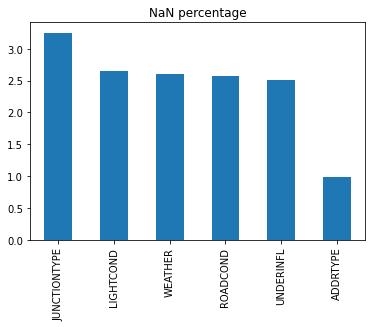

In [13]:
import matplotlib.pyplot as plt

def show_null():
    col_with_null = []
    for (columnName, columnData) in df.iteritems():
        if columnData.isnull().sum():
            col_with_null.append(columnName)

    if col_with_null == []:
        print("no null")
        return
    df_na = ((df[col_with_null].isnull().sum() / len(df[col_with_null])) * 100).sort_values(ascending=False)
    df_na.plot(kind='bar')

    plt.title("NaN percentage")
    plt.show()

show_null()

In [14]:
df.dropna(subset=['JUNCTIONTYPE', 'ROADCOND', 'WEATHER', 'LIGHTCOND', 'ADDRTYPE'], inplace=True)
df

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY
0,2,Intersection,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0
1,1,Block,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0
2,1,Block,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0
3,1,Block,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0
4,2,Intersection,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Block,3,0,0,2,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0
194669,1,Block,2,0,0,2,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,0,0
194670,2,Intersection,3,0,0,2,1/19/2019 9:25:00 AM,At Intersection (intersection related),N,Clear,Dry,Daylight,0,0
194671,2,Intersection,2,0,1,1,1/15/2019 4:48:00 PM,At Intersection (intersection related),N,Clear,Dry,Dusk,4308,0


In [15]:
for (columnName, columnData) in df.iteritems():
    if len(df[columnName].value_counts().to_list()) == 1:
        print(columnName + " is not needed")

In [16]:
show_null()

no null


In [17]:
df.head()


,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY
0,2,Intersection,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0
1,1,Block,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0
2,1,Block,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0
3,1,Block,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0
4,2,Intersection,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0


In [18]:
df.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDTTM         object
JUNCTIONTYPE    object
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
SEGLANEKEY       int64
CROSSWALKKEY     int64
dtype: object

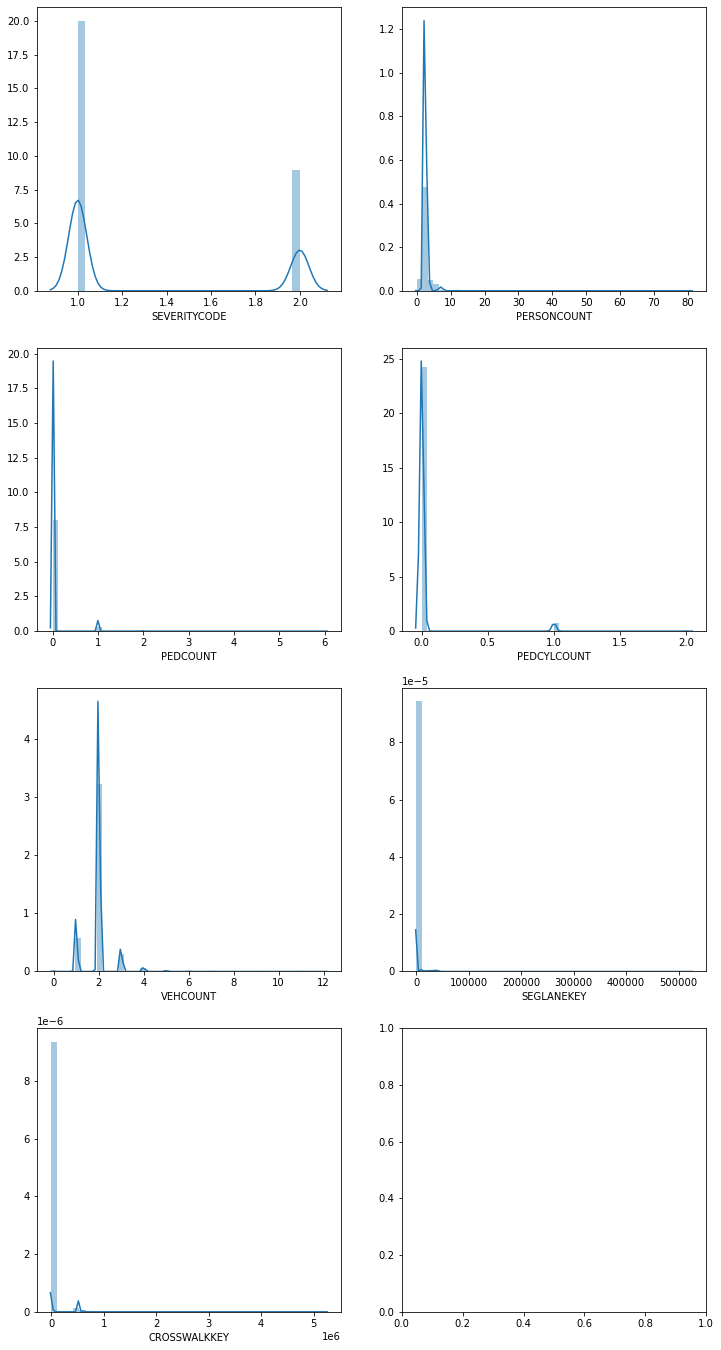

In [19]:
import math
import seaborn as sns

numeric = []
for i in df.columns:
    if df[i].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numeric.append(i)


def graph_numeric():
    fig, axes = plt.subplots(nrows=math.ceil(len(numeric)/2), ncols=2, figsize = (12, 24))

    for i, col in enumerate(df[numeric].columns):
        sns.distplot(df[col],ax=axes[i//2,i%2])
graph_numeric()



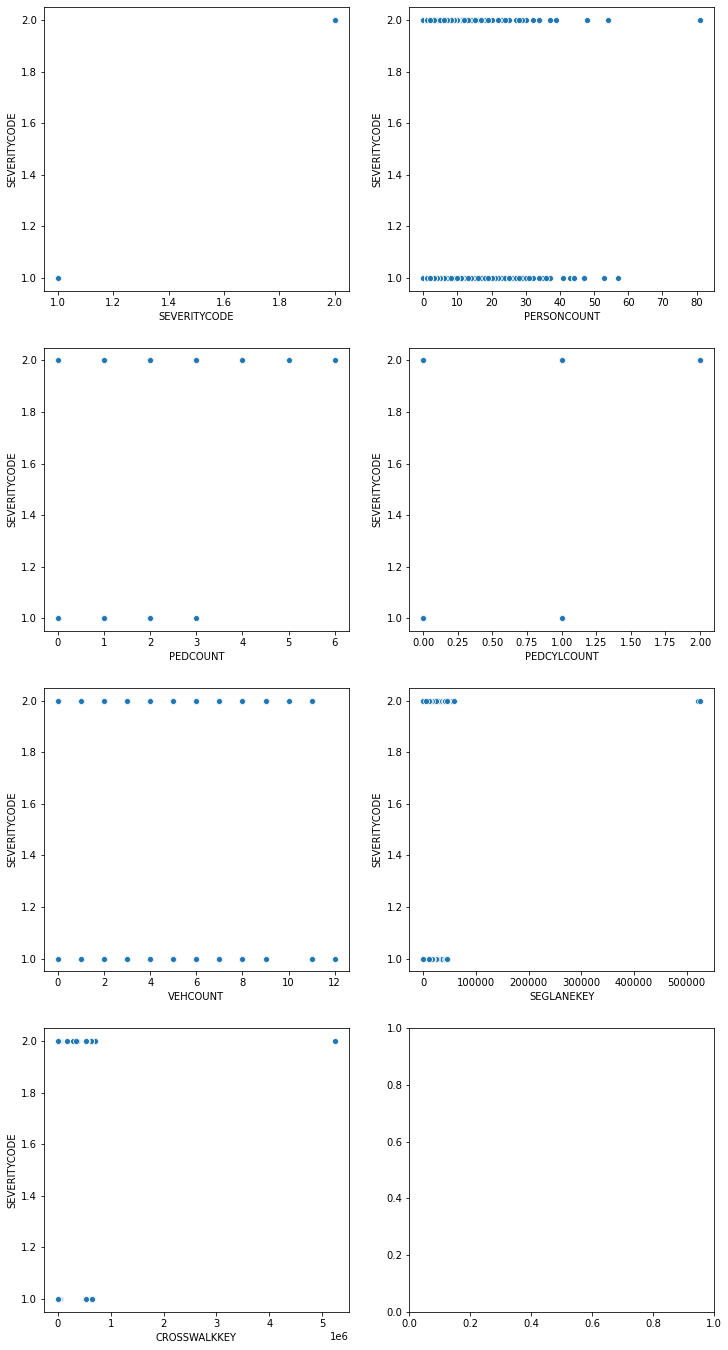

In [20]:
def graph_numeric2():
    
    fig, axes = plt.subplots(nrows=math.ceil(len(numeric)/2), ncols=2, figsize = (12, 24))

    for i, col in enumerate(df[numeric].columns):        
        sns.scatterplot(data=df, y='SEVERITYCODE', x=col, ax=axes[i//2,i%2])

graph_numeric2()

<AxesSubplot:xlabel='spearman', ylabel='feature'>

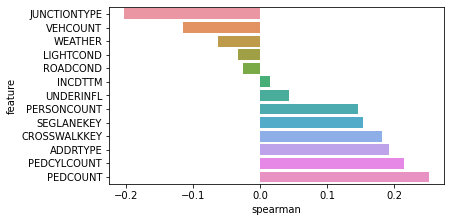

In [21]:
features = df.drop("SEVERITYCODE", axis=1).columns
spr = pd.DataFrame()
spr['feature'] = features
spr['spearman'] = [df[f].corr(df['SEVERITYCODE'], 'spearman') for f in features]
spr = spr.sort_values('spearman')
plt.figure(figsize=(6, 0.25*len(features)))
sns.barplot(data=spr, y='feature', x='spearman', orient='h')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.get_dummies(df.drop('INCDTTM', axis=1))

for col in df.columns:
    if col != 'SEVERITYCODE':
        df[col] = StandardScaler().fit_transform(df[[col]])
X = df.drop('SEVERITYCODE', axis=1)
y = df['SEVERITYCODE'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02)

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


kf = KFold(shuffle=False, n_splits=10)


Cs = [.001, .01, .1, 1, 10, 100]
lista = []
for c in Cs:
    LogisticRegression(C=c)
    lista.append(np.average(cross_val_score(LogisticRegression(C=c), X_train, y_train, cv=kf)))
print(lista)
lr = LogisticRegression(C=Cs[lista.index(max(lista))]).fit(X_train, y_train)
f1_score(lr.predict(X_test), y_test, average='weighted')

[0.7438397509301761, 0.7436779725606791, 0.7436612355365798, 0.7436723925152701, 0.7436723925152701, 0.7436723925152701]


0.7930687536760375

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SEGLANEKEY', 'CROSSWALKKEY', 'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown', 'UNDERINFL_0',
       'UNDERINFL_1', 'UNDERINFL_N', 'UNDERINFL_Y',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy',
       'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'R